**Breast Cancer Survival Prediction Exploratory Data Analysis**

>[1.Introduction](#scrollTo=6npGV1VazJGv)

>[2.Load the data](#scrollTo=hdqyTTMObRG_)

>[3.Explore The Data](#scrollTo=IZUhCUOSKq5b)



# 1.Introduction

In the last section data wrangling was done by exploring and cleaning the data. Most of the features were categorical and were converted to numeric data using labeling method. Also as the data was imbalanced  SMOTE method used to add some synthetic data and eventually very nice and balanced data was produced.

In this section we will dive deeper to explore the data.


In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#2.Load the data

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Git/Springboard/capston 2 project/data/bc_data_synthetic_labeled.csv')

In [4]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Status
0,43,1,1,1,2,4,1,1,40,1,1,19,11,0
1,47,1,1,1,1,2,1,1,45,1,1,25,9,0
2,67,2,1,1,0,1,2,1,25,1,1,4,1,1
3,46,2,0,0,0,0,1,1,19,1,1,26,1,1
4,63,2,1,1,1,2,1,1,35,1,1,21,5,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6816 entries, 0 to 6815
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     6816 non-null   int64
 1   Race                    6816 non-null   int64
 2   Marital Status          6816 non-null   int64
 3   T Stage                 6816 non-null   int64
 4   N Stage                 6816 non-null   int64
 5   6th Stage               6816 non-null   int64
 6   Grade                   6816 non-null   int64
 7   A Stage                 6816 non-null   int64
 8   Tumor Size              6816 non-null   int64
 9   Estrogen Status         6816 non-null   int64
 10  Progesterone Status     6816 non-null   int64
 11  Regional Node Examined  6816 non-null   int64
 12  Reginol Node Positive   6816 non-null   int64
 13  Status                  6816 non-null   int64
dtypes: int64(14)
memory usage: 745.6 KB


#3.Explore The Data

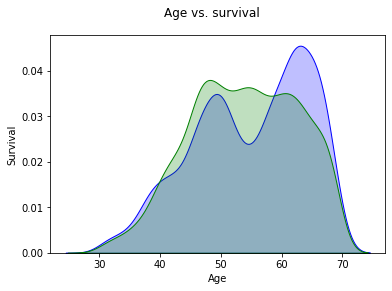

In [6]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["Status"]==1]["Age"], shade=True, color="blue", label="survived", ax=ax)
sns.kdeplot(df[df["Status"]==0]["Age"], shade=True, color="green", label="did not survive", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Survival")

fig.suptitle("Age vs. survival");

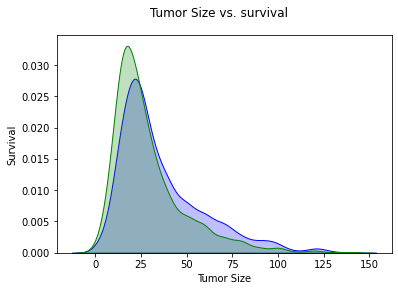

In [8]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["Status"]==1]["Tumor Size"], shade=True, color="blue", label="survived", ax=ax)
sns.kdeplot(df[df["Status"]==0]["Tumor Size"], shade=True, color="green", label="did not survive", ax=ax)

ax.set_xlabel("Tumor Size")
ax.set_ylabel("Survival")

fig.suptitle("Tumor Size vs. survival");

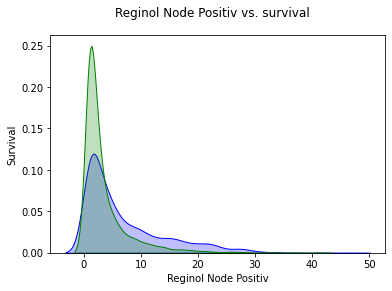

In [9]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["Status"]==1]["Reginol Node Positive"], shade=True, color="blue", label="survived", ax=ax)
sns.kdeplot(df[df["Status"]==0]["Reginol Node Positive"], shade=True, color="green", label="did not survive", ax=ax)

ax.set_xlabel("Reginol Node Positiv")
ax.set_ylabel("Survival")

fig.suptitle("Reginol Node Positiv vs. survival");

In [16]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Status'],
      dtype='object')

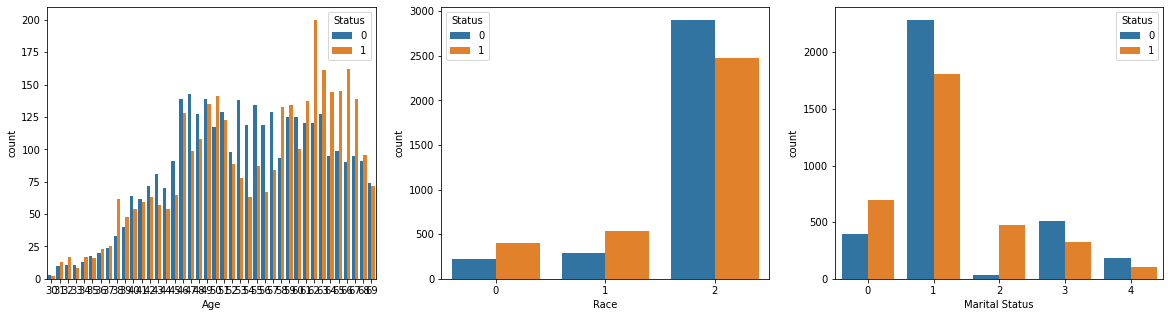

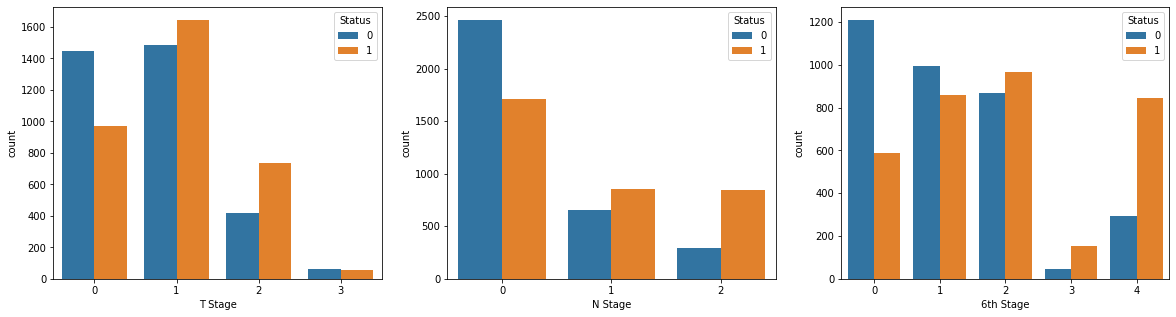

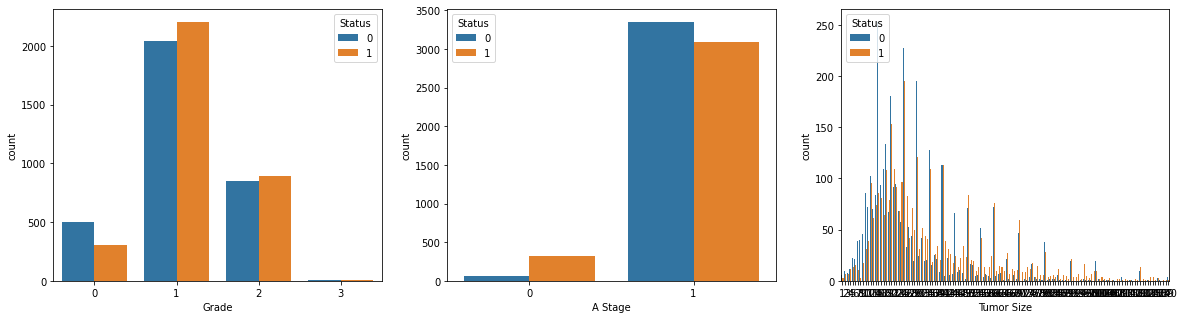

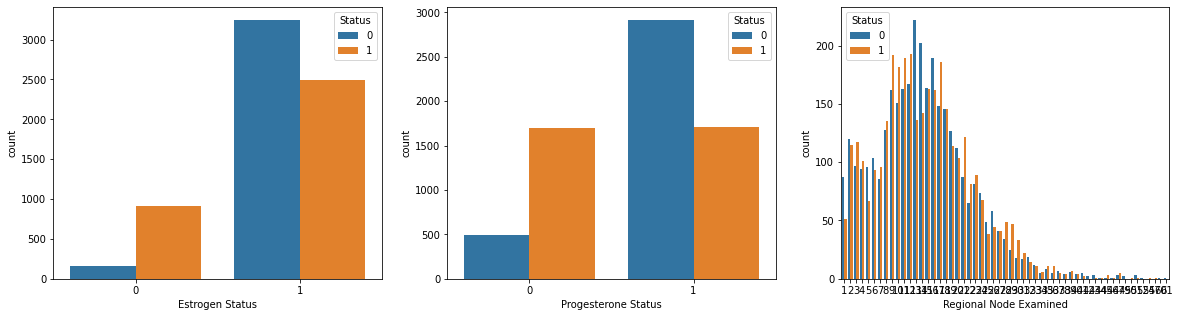

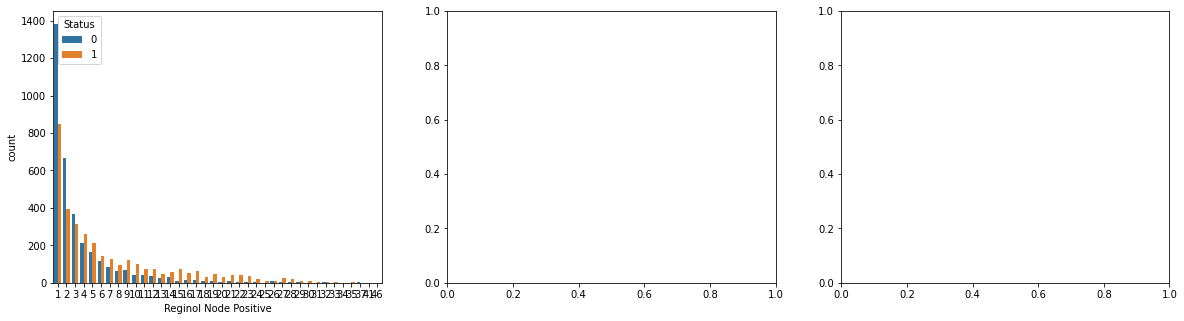

In [18]:
plt.close('all')
count = 0
for item in df.columns:
  if item != 'Status':
    index = count%3
    if index == 0:
      fig, ax = plt.subplots(1,3,figsize = (20,5))
    sns.countplot(x=item, hue='Status', data=df, ax=ax[index]);
    count +=1